In [ ]:
import collections
from io import StringIO

import numpy as np
import pandas as pd
import pydotplus
import seaborn as sns
from ipywidgets import Image
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (10, 8)

In [ ]:
# Create dataframe with dummy variables
def create_df(dic, feature_list):
    out = pd.DataFrame(dic)
    out = pd.concat([out, pd.get_dummies(out[feature_list])], axis=1)
    out.drop(feature_list, axis=1, inplace=True)
    return out


# Some feature values are present in train and absent in test and vice-versa.
def intersect_features(train, test):
    common_feat = list(set(train.keys()) & set(test.keys()))
    return train[common_feat], test[common_feat]

In [ ]:
features = ["Looks", "Alcoholic_beverage", "Eloquence", "Money_spent"]

In [ ]:
df_train = {}
df_train["Looks"] = [
    "handsome",
    "handsome",
    "handsome",
    "repulsive",
    "repulsive",
    "repulsive",
    "handsome",
]
df_train["Alcoholic_beverage"] = ["yes", "yes", "no", "no", "yes", "yes", "yes"]
df_train["Eloquence"] = ["high", "low", "average", "average", "low", "high", "average"]
df_train["Money_spent"] = ["lots", "little", "lots", "little", "lots", "lots", "lots"]
df_train["Will_go"] = LabelEncoder().fit_transform(["+", "-", "+", "-", "-", "+", "+"])

df_train = create_df(df_train, features)
df_train

,Will_go,Looks_handsome,Looks_repulsive,Alcoholic_beverage_no,Alcoholic_beverage_yes,Eloquence_average,Eloquence_high,Eloquence_low,Money_spent_little,Money_spent_lots
0,0,1,0,0,1,0,1,0,0,1
1,1,1,0,0,1,0,0,1,1,0
2,0,1,0,1,0,1,0,0,0,1
3,1,0,1,1,0,1,0,0,1,0
4,1,0,1,0,1,0,0,1,0,1
5,0,0,1,0,1,0,1,0,0,1
6,0,1,0,0,1,1,0,0,0,1


In [ ]:
df_test = {}
df_test["Looks"] = ["handsome", "handsome", "repulsive"]
df_test["Alcoholic_beverage"] = ["no", "yes", "yes"]
df_test["Eloquence"] = ["average", "high", "average"]
df_test["Money_spent"] = ["lots", "little", "lots"]
df_test = create_df(df_test, features)
df_test

,Looks_handsome,Looks_repulsive,Alcoholic_beverage_no,Alcoholic_beverage_yes,Eloquence_average,Eloquence_high,Money_spent_little,Money_spent_lots
0,1,0,1,0,1,0,0,1
1,1,0,0,1,0,1,1,0
2,0,1,0,1,1,0,0,1


In [ ]:
# Some feature values are present in train and absent in test and vice-versa.
y = df_train["Will_go"]
df_train, df_test = intersect_features(train=df_train, test=df_test)
df_train

,Looks_handsome,Eloquence_high,Alcoholic_beverage_no,Eloquence_average,Money_spent_lots,Money_spent_little,Alcoholic_beverage_yes,Looks_repulsive
0,1,1,0,0,1,0,1,0
1,1,0,0,0,0,1,1,0
2,1,0,1,1,1,0,0,0
3,0,0,1,1,0,1,0,1
4,0,0,0,0,1,0,1,1
5,0,1,0,0,1,0,1,1
6,1,0,0,1,1,0,1,0


In [ ]:
df_test

,Looks_handsome,Eloquence_high,Alcoholic_beverage_no,Eloquence_average,Money_spent_lots,Money_spent_little,Alcoholic_beverage_yes,Looks_repulsive
0,1,0,1,1,1,0,0,0
1,1,1,0,0,0,1,1,0
2,0,0,0,1,1,0,1,1


In [ ]:
#1.1
a, b = y.value_counts()
S = -a/y.size*np.log2(a/y.size) - b/y.size*np.log2(b/y.size)
print(S)

0.9852281360342515


In [ ]:
#1.2
handsome_feature = df_train[["Looks_handsome"]];
treeCls = DecisionTreeClassifier(random_state=17, max_depth=1, criterion="entropy", splitter="best")
treeCls.fit(handsome_feature, y)
tree_strct = treeCls.tree_
gini = tree_strct.impurity
change = gini[0] - b/y.size*gini[1] - a/y.size*gini[2]
print(change)

0.12808527889139454


In [ ]:
#Q1.3
dt = DecisionTreeClassifier(criterion="entropy", random_state=17)
dt.fit(df_train, y);

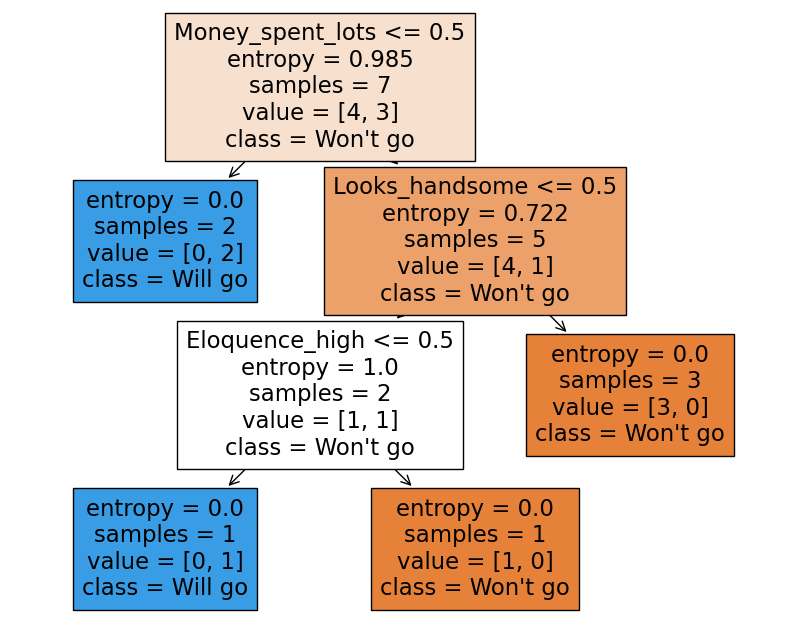

In [ ]:
#Q1.4
from sklearn.tree import plot_tree
plot_tree(dt, feature_names=df_train.columns, filled=True, class_names=["Won't go", "Will go"]);

# PART 2

In [ ]:
balls = [1 for i in range(9)] + [0 for i in range(11)]
# two groups
balls_left = [1 for i in range(8)] + [0 for i in range(5)]  # 8 blue and 5 yellow
balls_right = [1 for i in range(1)] + [0 for i in range(6)]  # 1 blue and 6 yellow

In [ ]:
from math import log

def entropy(a_list):
    lst = list(a_list)
    size = len(lst)
    entropy = 0
    set_elements = len(set(lst))
    if set_elements in [0, 1]:
        return 0
    for i in set(lst):
        occ = lst.count(i)
        entropy -= occ / size * log(occ / size, 2)
    return entropy

#tests
print(entropy(balls))  # 9 blue and 11 yellow ones
print(entropy(balls_left))  # 8 blue and 5 yellow ones
print(entropy(balls_right))  # 1 blue and 6 yellow ones
print(entropy([1, 2, 3, 4, 5, 6]))  # entropy of a fair 6-sided die

0.9927744539878084
0.961236604722876
0.5916727785823275
2.584962500721156


In [ ]:
def information_gain(root, r, l):
    """Outputs information gain when splitting with each feature"""
    return entropy(root) - 1.0*len(r)/len(root)*entropy(r) - 1.0*len(l)/len(root)*entropy(l)

information_gain(balls, balls_right, balls_left)

0.16088518841412436

In [ ]:
def information_gains(X, y):
    """Outputs information gain when splitting with each feature"""
    out = []
    for i in X.columns:
        out.append(information_gain(y, y[X[i] == 0], y[X[i] == 1]))
    return out

information_gains(df_train, y)

[0.12808527889139454,
 0.2916919971380598,
 0.005977711423774124,
 0.02024420715375619,
 0.46956521111470706,
 0.46956521111470706,
 0.005977711423774124,
 0.12808527889139454]

In [ ]:
def decTree(y, X, features):
  clf = information_gains(X, y)
  bestFeatNum = clf.index(max(clf))
  bestFeatName = features[bestFeatNum]
  print("Best feature: " + bestFeatName)

  xright = X[X.iloc[:, bestFeatNum] == 0]
  xleft = X[X.iloc[:, bestFeatNum] == 1]
  print(f"Partition: {len(xright)} and {len(xleft)}")

  yright = y[X.iloc[:, bestFeatNum] == 0]
  yleft = y[X.iloc[:, bestFeatNum] == 1]
  print(f"Entropy: {entropy(yright)} and {entropy(yleft)}")
  print("\n"+ "*"*30 + "\n")

  if (entropy(yright) != 0):
    print("Splitting the group:")
    decTree(yright, xright, features)
  if (entropy(yleft) != 0):
    print("Splitting the group:")
    decTree(yleft, xleft, features)
decTree(y, df_train, df_train.columns)

Best feature: Money_spent_lots
Partition: 2 and 5
Entropy: 0 and 0.7219280948873623

******************************

Splitting the group:
Best feature: Looks_handsome
Partition: 2 and 3
Entropy: 1.0 and 0

******************************

Splitting the group:
Best feature: Eloquence_high
Partition: 1 and 1
Entropy: 0 and 0

******************************



# TASK 3

In [ ]:
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

In [ ]:
data_train = pd.read_csv(DATA_PATH + "adult_train.csv", sep=";")
data_train.tail()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [ ]:
data_test = pd.read_csv(DATA_PATH + "adult_test.csv", sep=";")
data_test.tail()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16278,64,NaN,321403.0,HS-grad,9.0,Widowed,NaN,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.
16281,35,Self-emp-inc,182148.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,60.0,United-States,>50K.


In [ ]:
# necessary to remove rows with incorrect labels in test dataset
data_test = data_test[
    (data_test["Target"] == " >50K.") | (data_test["Target"] == " <=50K.")
]

# encode target variable as integer
data_train.loc[data_train["Target"] == " <=50K", "Target"] = 0
data_train.loc[data_train["Target"] == " >50K", "Target"] = 1

data_test.loc[data_test["Target"] == " <=50K.", "Target"] = 0
data_test.loc[data_test["Target"] == " >50K.", "Target"] = 1

In [ ]:
data_test.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,16281,73,35,461,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Workclass,15318,8,Private,11210,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,16281.0,NaN,NaN,NaN,189435.677784,105714.907671,13492.0,116736.0,177831.0,238384.0,1490400.0
Education,16281,16,HS-grad,5283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_Num,16281.0,NaN,NaN,NaN,10.072907,2.567545,1.0,9.0,10.0,12.0,16.0
Martial_Status,16281,7,Married-civ-spouse,7403,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,15315,14,Prof-specialty,2032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Relationship,16281,6,Husband,6523,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race,16281,5,White,13946,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,16281,2,Male,10860,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_train["Target"].value_counts()

0    24720
1     7841
Name: Target, dtype: int64

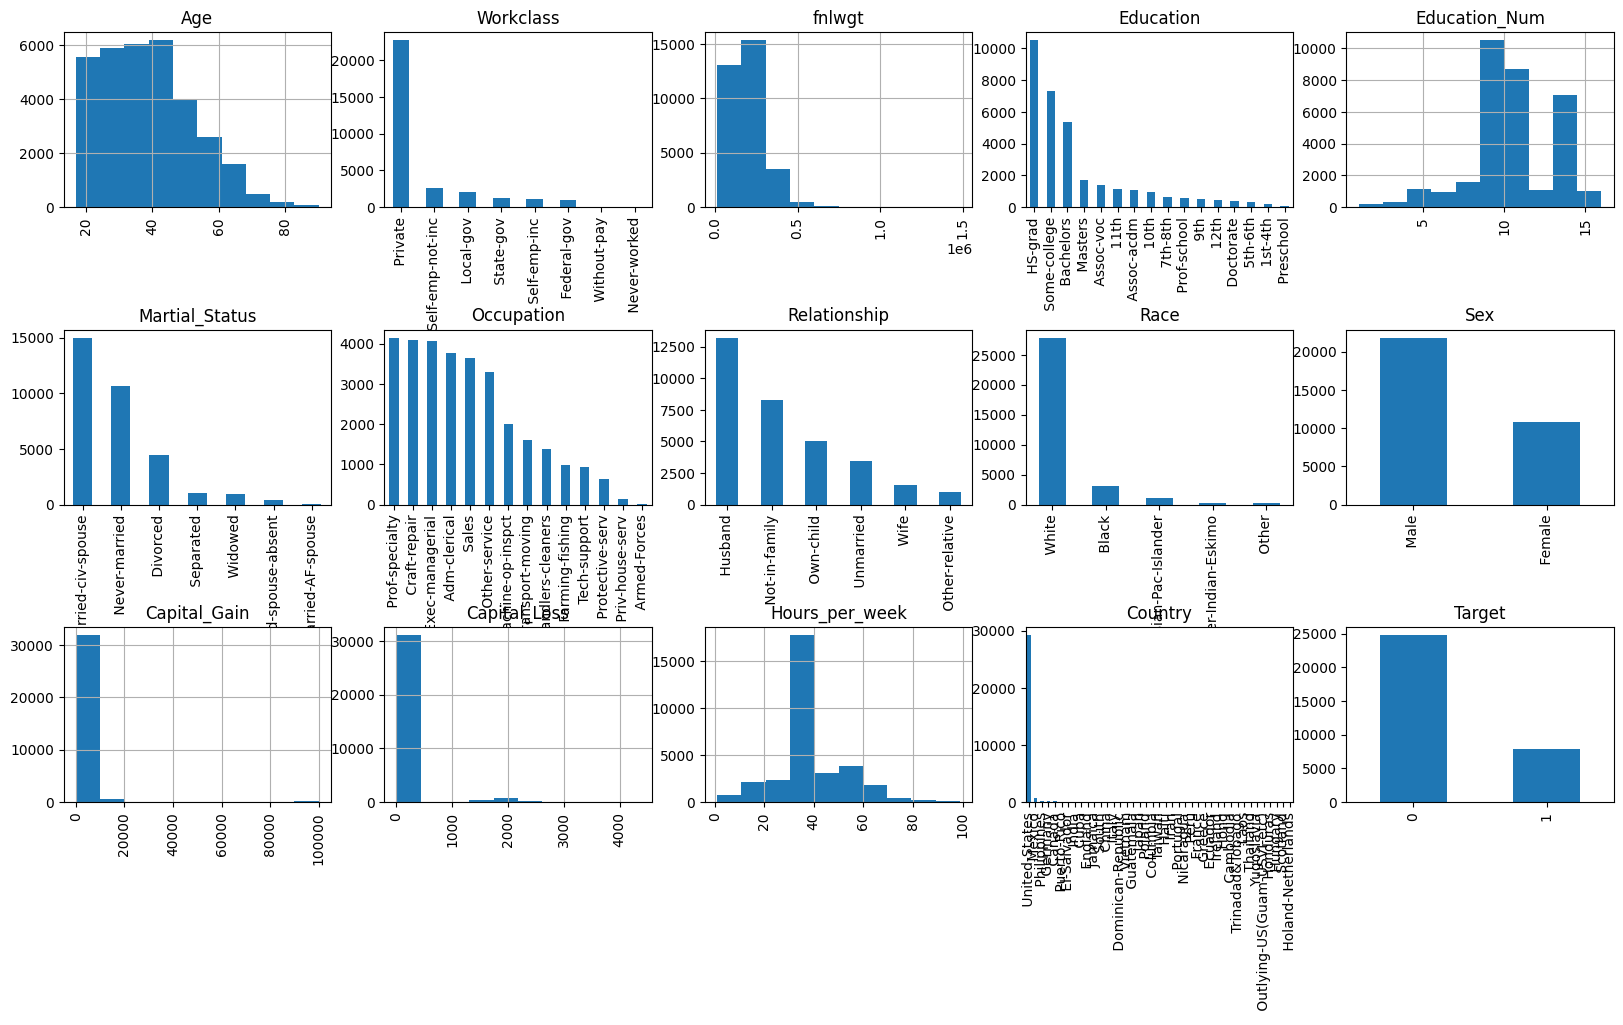

In [ ]:
fig = plt.figure(figsize=(20, 10))
cols = 5
rows = int(data_train.shape[1] / cols)
for i, column in enumerate(data_train.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if data_train.dtypes[column] == object:
        data_train[column].value_counts().plot(kind="bar", axes=ax)
    else:
        data_train[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2);

In [ ]:
data_train.dtypes

Age                int64
Workclass         object
fnlwgt             int64
Education         object
Education_Num      int64
Martial_Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_Gain       int64
Capital_Loss       int64
Hours_per_week     int64
Country           object
Target            object
dtype: object

In [ ]:
data_test.dtypes

Age                object
Workclass          object
fnlwgt            float64
Education          object
Education_Num     float64
Martial_Status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital_Gain      float64
Capital_Loss      float64
Hours_per_week    float64
Country            object
Target             object
dtype: object

In [ ]:
data_test["Age"] = data_test["Age"].astype(int)
data_test["fnlwgt"] = data_test["fnlwgt"].astype(int)
data_test["Education_Num"] = data_test["Education_Num"].astype(int)
data_test["Capital_Gain"] = data_test["Capital_Gain"].astype(int)
data_test["Capital_Loss"] = data_test["Capital_Loss"].astype(int)
data_test["Hours_per_week"] = data_test["Hours_per_week"].astype(int)

y_train = data_train.pop('Target')
y_test = data_test.pop('Target')

In [ ]:
data_test.dtypes

Age                int64
Workclass         object
fnlwgt             int64
Education         object
Education_Num      int64
Martial_Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_Gain       int64
Capital_Loss       int64
Hours_per_week     int64
Country           object
dtype: object

In [ ]:
# choose categorical and continuous features from data

categorical_columns = [
    c for c in data_train.columns if data_train[c].dtype.name == "object"
]
numerical_columns = [
    c for c in data_train.columns if data_train[c].dtype.name != "object"
]

print("categorical_columns:", categorical_columns)
print("numerical_columns:", numerical_columns)

categorical_columns: ['Workclass', 'Education', 'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country']
numerical_columns: ['Age', 'fnlwgt', 'Education_Num', 'Capital_Gain', 'Capital_Loss', 'Hours_per_week']


In [ ]:
# we see some missing values
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Martial_Status  32561 non-null  object
 6   Occupation      30718 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_Gain    32561 non-null  int64 
 11  Capital_Loss    32561 non-null  int64 
 12  Hours_per_week  32561 non-null  int64 
 13  Country         31978 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [ ]:
for c in categorical_columns:
  data_train[c].fillna(data_train[c].mode()[0], inplace=True)
  data_test[c].fillna(data_train[c].mode()[0], inplace=True)

for c in numerical_columns:
  data_train[c].fillna(data_train[c].mode()[0], inplace=True)
  data_test[c].fillna(data_train[c].mode()[0], inplace=True)

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Martial_Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_Gain    32561 non-null  int64 
 11  Capital_Loss    32561 non-null  int64 
 12  Hours_per_week  32561 non-null  int64 
 13  Country         32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [ ]:
data_train = pd.concat(
    [data_train[numerical_columns], pd.get_dummies(data_train[categorical_columns])],
    axis=1,
)

data_test = pd.concat(
    [data_test[numerical_columns], pd.get_dummies(data_test[categorical_columns])],
    axis=1,
)

In [ ]:
data_train.shape, data_test.shape

((32561, 105), (16281, 104))

In [ ]:
set(data_train.columns) - set(data_test.columns)

{'Country_ Holand-Netherlands'}

In [ ]:
data_test["Country_ Holand-Netherlands"] = 0

In [ ]:
set(data_train.columns) - set(data_test.columns)

set()

In [ ]:
data_train.head(2)

,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,...,Country_ Portugal,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
data_test.head(2)

,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,...,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia,Country_ Holand-Netherlands
1,25,226802,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,38,89814,9,0,0,50,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
X_train = data_train
X_test = data_test

In [ ]:
unique_values = y_train.unique()
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [ ]:
X_train.dtypes

Age                         int64
fnlwgt                      int64
Education_Num               int64
Capital_Gain                int64
Capital_Loss                int64
                            ...  
Country_ Thailand           uint8
Country_ Trinadad&Tobago    uint8
Country_ United-States      uint8
Country_ Vietnam            uint8
Country_ Yugoslavia         uint8
Length: 105, dtype: object

In [ ]:
#Q3.1
tree = DecisionTreeClassifier(max_depth=3, random_state=17)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=17)

In [ ]:
X_test = X_test[X_train.columns]
tree_predictions = tree.predict(X_test)

In [ ]:
accuracy_score(y_test, tree_predictions)

0.8447884036607088

In [ ]:
#Q3.2
tree_params = {"max_depth": range(2, 11)}
locally_best_tree = GridSearchCV(estimator=DecisionTreeClassifier(random_state=17), param_grid=tree_params, cv=5)
locally_best_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=17),
             param_grid={'max_depth': range(2, 11)})

In [ ]:
print("Best params:", locally_best_tree.best_params_)
print("Best cross validaton score", locally_best_tree.best_score_)

Best params: {'max_depth': 9}
Best cross validaton score 0.8565770273854106


In [ ]:
tuned_tree = DecisionTreeClassifier(max_depth=9, random_state=17)
tuned_tree.fit(X_train, y_train)
tuned_tree_predictions = tuned_tree.predict(X_test)
accuracy_score(y_test, tuned_tree_predictions)

0.8579939807137154

In [ ]:
#Q3.3
rf = RandomForestClassifier(random_state=17, n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=17)

In [ ]:
rfpred = rf.predict(X_test)

In [ ]:
accuracy_score(y_test, rfpred)

0.8525274860266568

In [ ]:
#Q3.4
forest_params = {'max_depth': range(10, 21),
                 'max_features': range(5, 105, 20)}

locally_best_forest = GridSearchCV(estimator=RandomForestClassifier(random_state=17, n_estimators=10, n_jobs=-1), param_grid=forest_params, cv=3)

locally_best_forest.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_estimators=10, n_jobs=-1,
                                              random_state=17),
             param_grid={'max_depth': range(10, 21),
                         'max_features': range(5, 105, 20)})

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

X = np.array([[1, 0, -1, -2, 7],[0, 3, 3, -3, 2]])

# Initialize PCA to reduce the data to 1 principal component
pca = PCA(n_components=1)


# Fit the data
pca.fit(X.T)  # Transpose because sklearn expects samples as rows

# Get the principal components (eigenvectors)
components = pca.components_

# Get the eigenvalues
eigenvalues = pca.explained_variance_

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

print("Original matrix shape:", X.shape)
print("\nPrincipal Components (Eigenvectors):")
print(components)
print("\nEigenvalues:")
print(eigenvalues)
print("\nExplained Variance Ratio:")
print(explained_variance_ratio)
ans = components[0].T@X
print(ans)
# Transform the data using all components
transformed_data = pca.transform(X.T).T

print("\nTransformed data:")
print(transformed_data)
print("Transformed data shape:", transformed_data.shape)

Original matrix shape: (2, 5)

Principal Components (Eigenvectors):
[[0.92387953 0.38268343]]

Eigenvalues:
[13.74264069]

Explained Variance Ratio:
[0.72329688]
[ 0.92387953  1.1480503   0.22417076 -2.99580936  7.23252359]

Transformed data:
[[-0.38268343 -0.15851267 -1.0823922  -4.30237233  5.92596063]]
Transformed data shape: (1, 5)


In [ ]:
print("Best params:", locally_best_forest.best_params_)
print("Best cross validaton score", locally_best_forest.best_score_)
rfgpred= locally_best_forest.predict(X_test)
accuracy_score(y_test, rfgpred)

Best params: {'max_depth': 14, 'max_features': 45}
Best cross validaton score 0.8619822161458556


0.8631533689576807